In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [4]:

# Load your stock price data into a DataFrame
# Replace 'your_data.csv' with the path to your data file
data = pd.read_excel('almostdone.xlsx')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


In [5]:
data.head()

,Symbol,EPS,Book Value,COF,Dividend,inflation,Remitannce in (billion),Growth in percent(%),Open,High,...,Bollinger_Middle,Bollinger_Upper,Bollinger_Lower,MACD,Signal_Line,ADX,polarity,subjectivity,rsi,ma 30
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-27,NABIL,46.7,210.0,4.63,0.48,6.0,606.68,7.0,1050.0,1050.0,...,1001.55,1074.016475,929.083525,9.680262,2.875483,21.652935,0.0,0.0,50.060921,993.766667
2018-04-28,NABIL,46.7,210.0,4.63,0.48,6.0,606.68,7.0,1050.0,1050.0,...,1001.55,1074.016475,929.083525,9.680262,2.875483,21.652935,0.0,0.0,50.060921,993.766667
2018-04-29,NABIL,46.7,210.0,4.63,0.48,6.0,606.68,7.0,1015.0,1020.0,...,1005.05,1072.865854,937.234146,8.143550,3.929096,20.613433,0.0,0.0,50.060921,993.766667
2018-04-30,NABIL,46.7,210.0,4.63,0.48,6.0,606.68,7.0,1015.0,1020.0,...,1005.05,1072.865854,937.234146,8.143550,3.929096,20.613433,0.0,0.0,50.060921,993.766667
2018-05-01,NABIL,46.7,210.0,4.63,0.48,6.0,606.68,7.0,1015.0,1020.0,...,1005.05,1072.865854,937.234146,8.143550,3.929096,20.613433,0.0,0.0,50.060921,993.766667


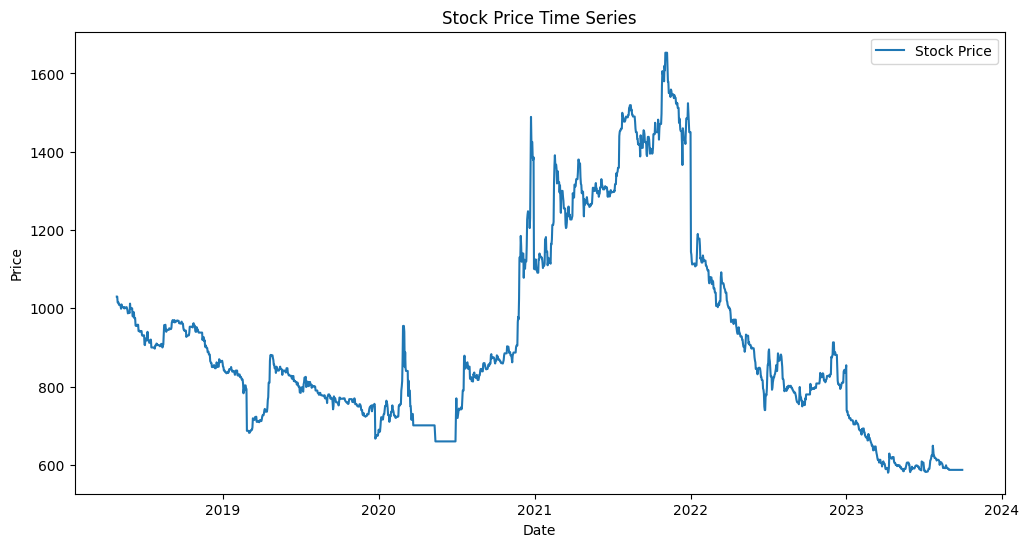

In [6]:

# Visualize the stock price time series
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Stock Price')
plt.title('Stock Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


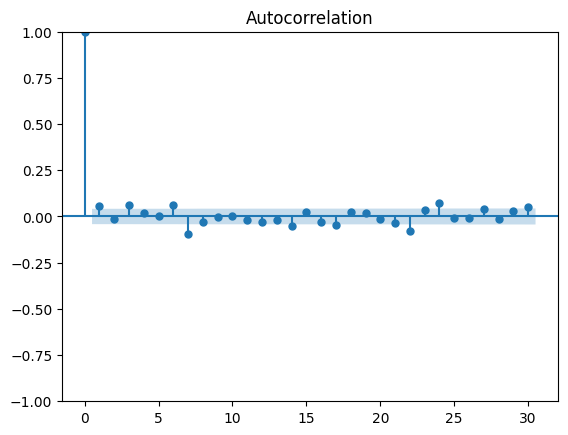

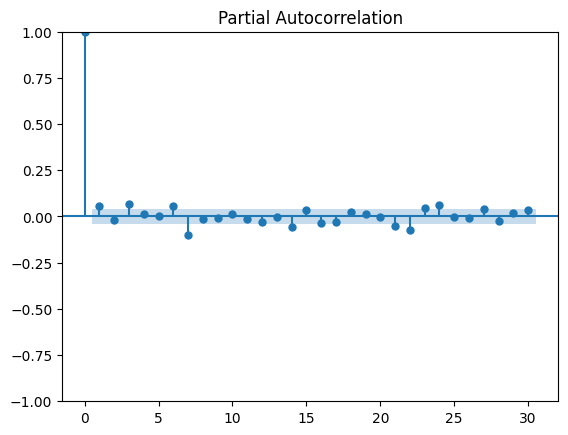

In [8]:

# Check for stationarity and apply differencing if needed
# You can use the Dickey-Fuller test or visual inspection
# Example of differencing:
x = data['Close'].diff().dropna()

# Plot ACF and PACF to determine ARIMA(p,d,q) orders
plot_acf(x, lags=30)
plot_pacf(x, lags=30)
plt.show()

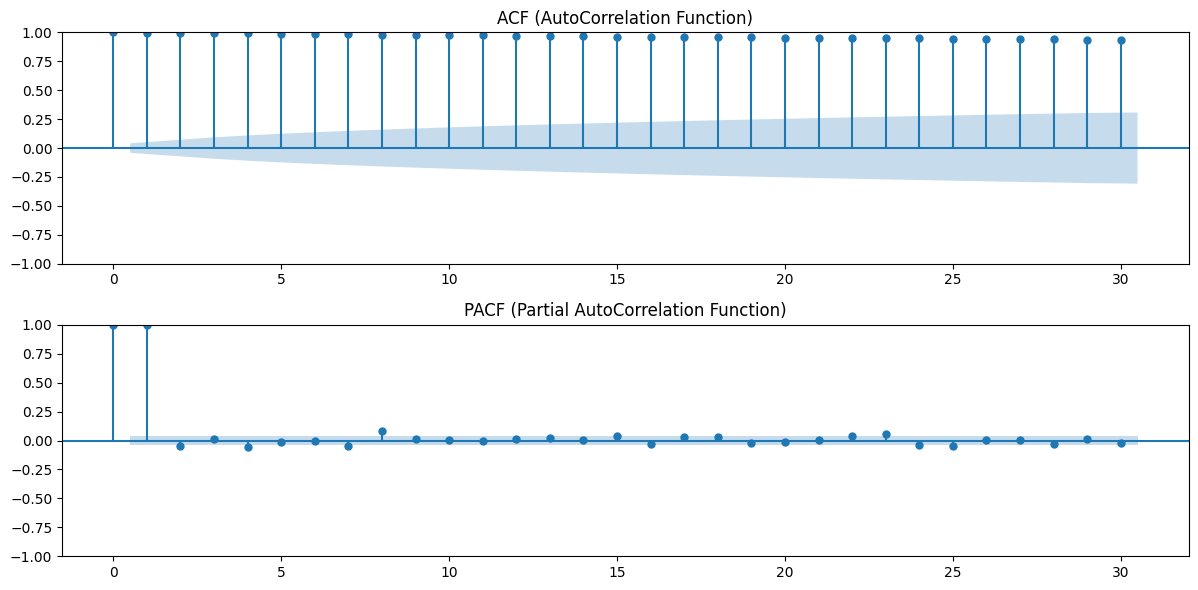

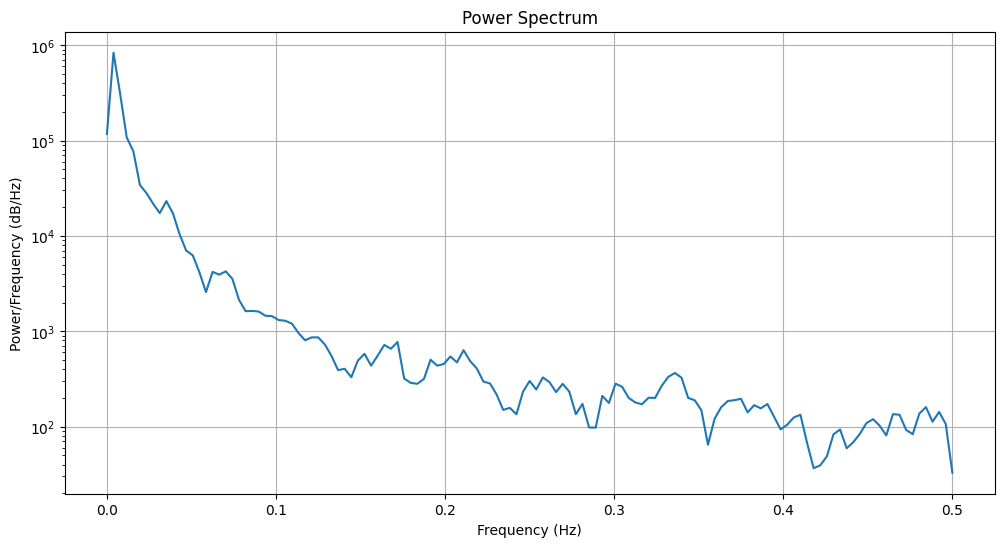

In [9]:
from scipy.signal import welch

# data['Close_diff'] = data['Close'].diff().dropna()

# Plot ACF (AutoCorrelation Function) and PACF (Partial AutoCorrelation Function)
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(data['Close'], lags=30, ax=plt.gca())
plt.title('ACF (AutoCorrelation Function)')

plt.subplot(212)
plot_pacf(data['Close'], lags=30, ax=plt.gca())
plt.title('PACF (Partial AutoCorrelation Function)')

plt.tight_layout()
plt.show()

# Calculate and plot the spectrum using Welch's method
frequencies, power_spectrum = welch(data['Close'], fs=1.0, nperseg=256)
plt.figure(figsize=(12, 6))
plt.semilogy(frequencies, power_spectrum)
plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)
plt.show()


In [30]:
x=pd.Series([1,2,3,4,5])

In [32]:
x.diff(1)

0    NaN
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64

In [31]:
x-x.diff(1)

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [16]:
pd.Series([1,2,3]).diff(2)

0    NaN
1    NaN
2    2.0
dtype: float64

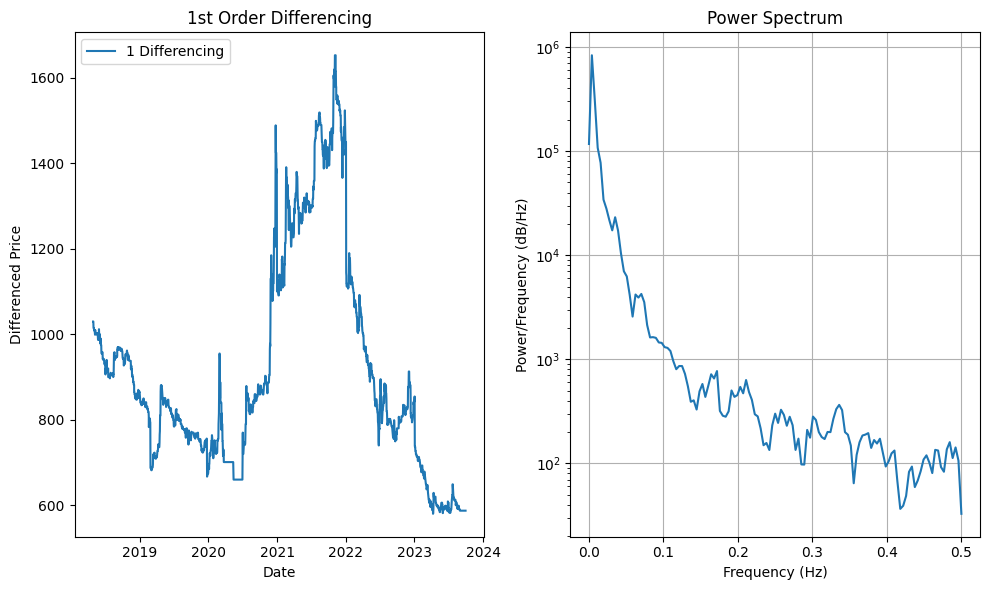

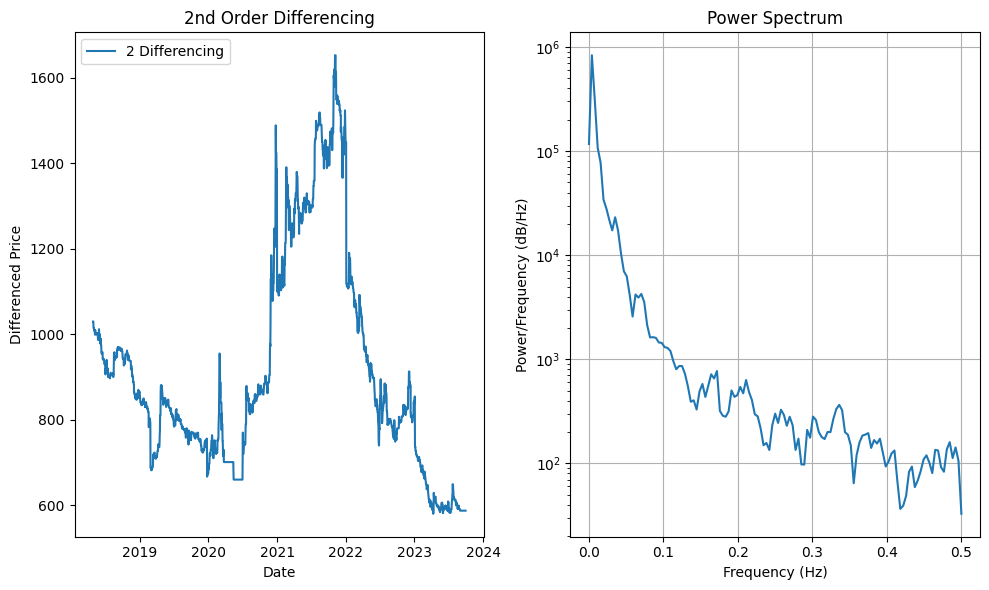

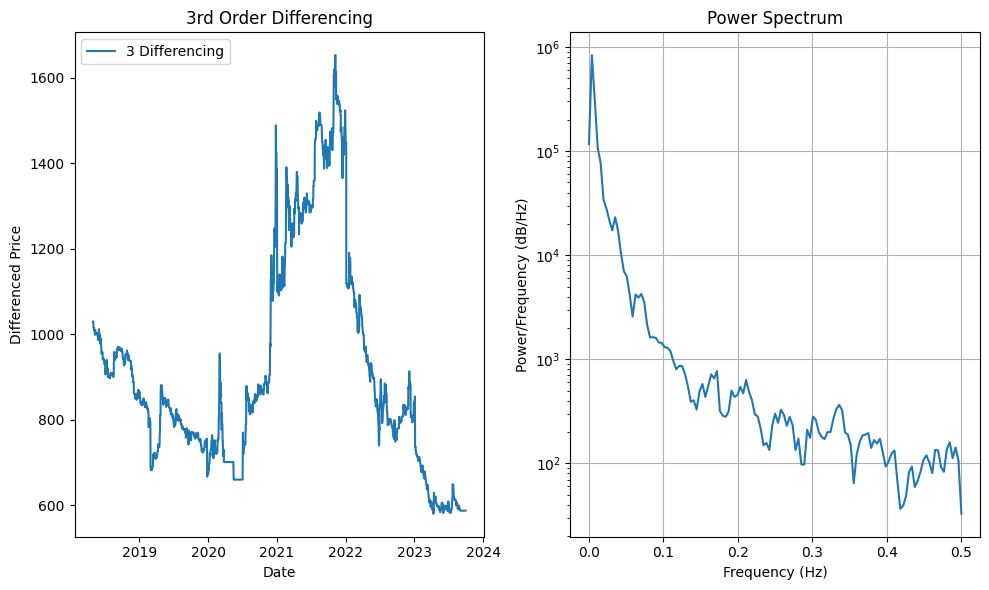

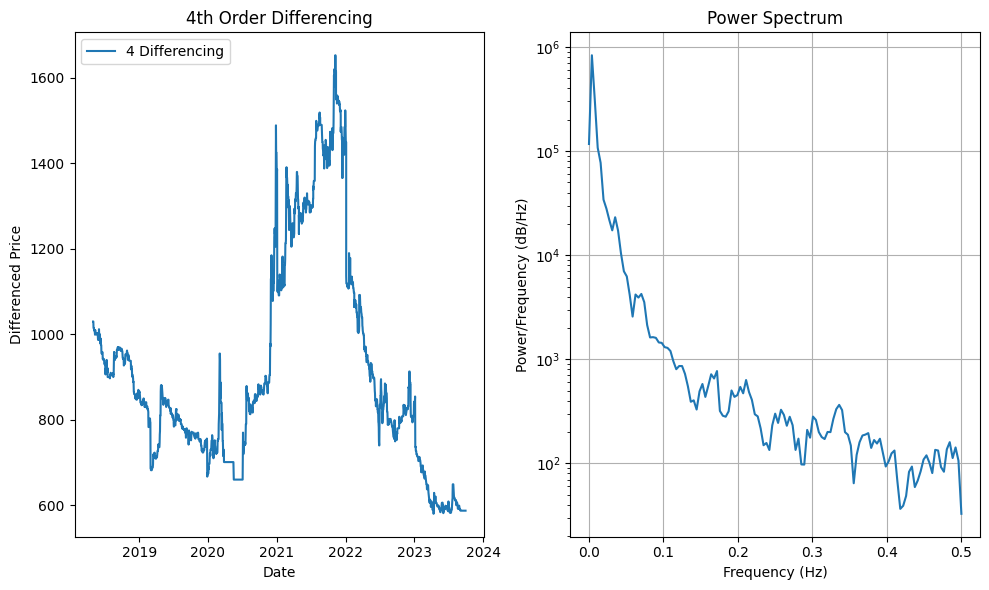

In [33]:
# Create a function to apply differencing and plot the differenced series and power spectrum
def plot_differencing_and_spectrum(series, order, title):
    differenced = series-series.diff(order)
    differenced = differenced.dropna()  # Remove NaN values

    plt.figure(figsize=(10, 6))

    # Plot the differenced series
    plt.subplot(121)
    plt.plot(differenced, label=f'{order} Differencing')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Differenced Price')
    plt.legend()

    # Calculate and plot the power spectrum using Welch's method
    frequencies, power_spectrum = welch(differenced, fs=1.0, nperseg=256)
    plt.subplot(122)
    plt.semilogy(frequencies, power_spectrum)
    plt.title('Power Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (dB/Hz)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Apply 2nd, 3rd, and 4th order differencing and plot the differenced series and power spectrum
plot_differencing_and_spectrum(data['Close'], order=1, title='1st Order Differencing')
plot_differencing_and_spectrum(data['Close'], order=2, title='2nd Order Differencing')
plot_differencing_and_spectrum(data['Close'], order=3, title='3rd Order Differencing')
plot_differencing_and_spectrum(data['Close'], order=4, title='4th Order Differencing')



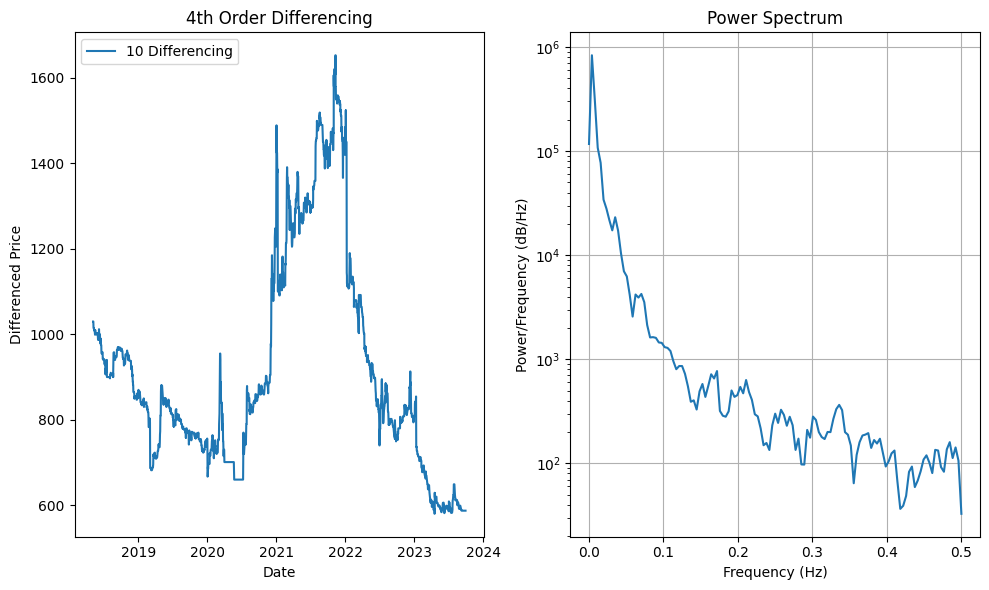

In [34]:
plot_differencing_and_spectrum(data['Close'], order=10, title='4th Order Differencing')

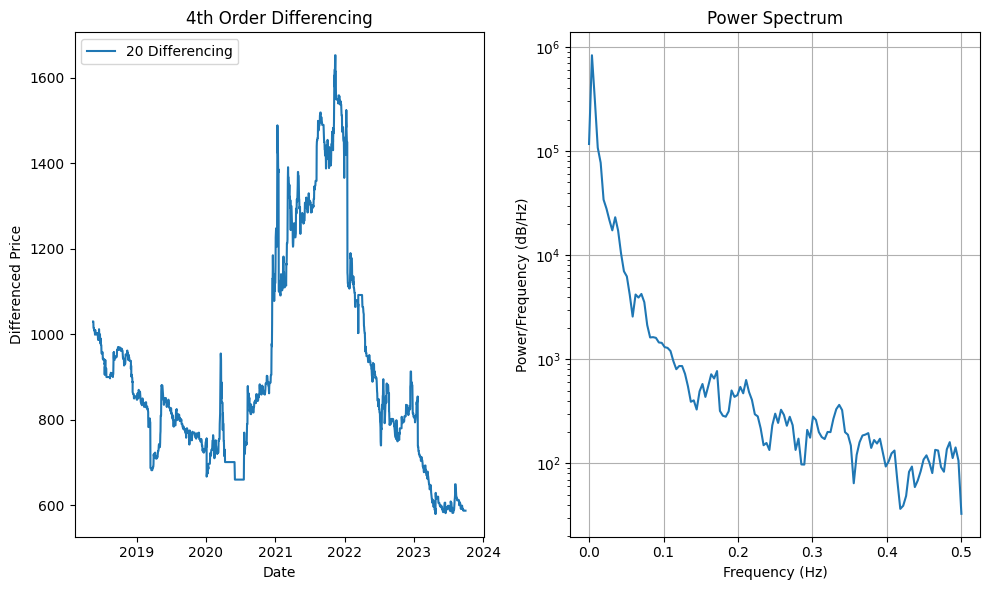

In [35]:
plot_differencing_and_spectrum(data['Close'], order=20, title='20th Order Differencing')

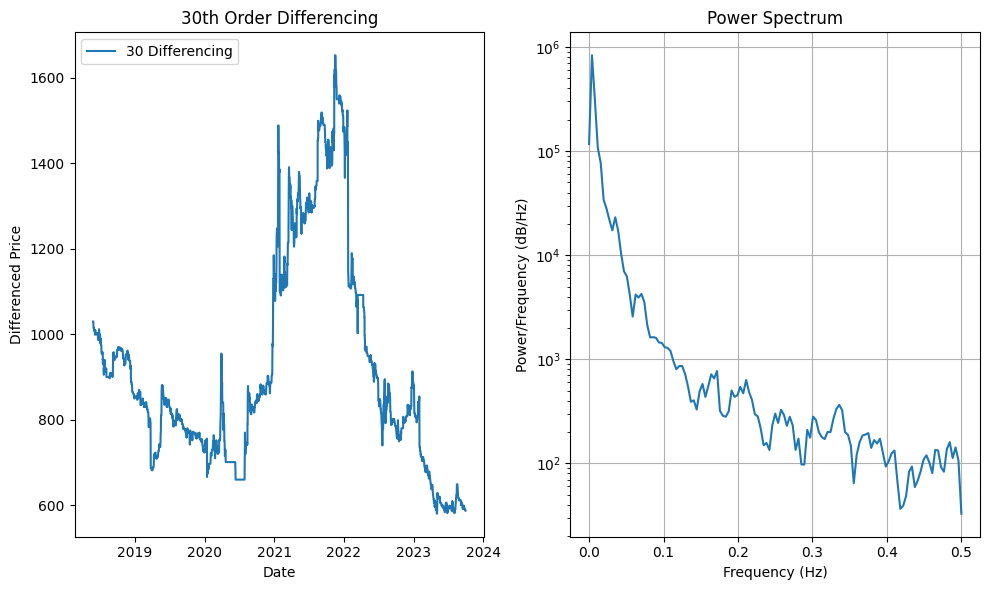

In [36]:
plot_differencing_and_spectrum(data['Close'], order=30, title='30th Order Differencing')

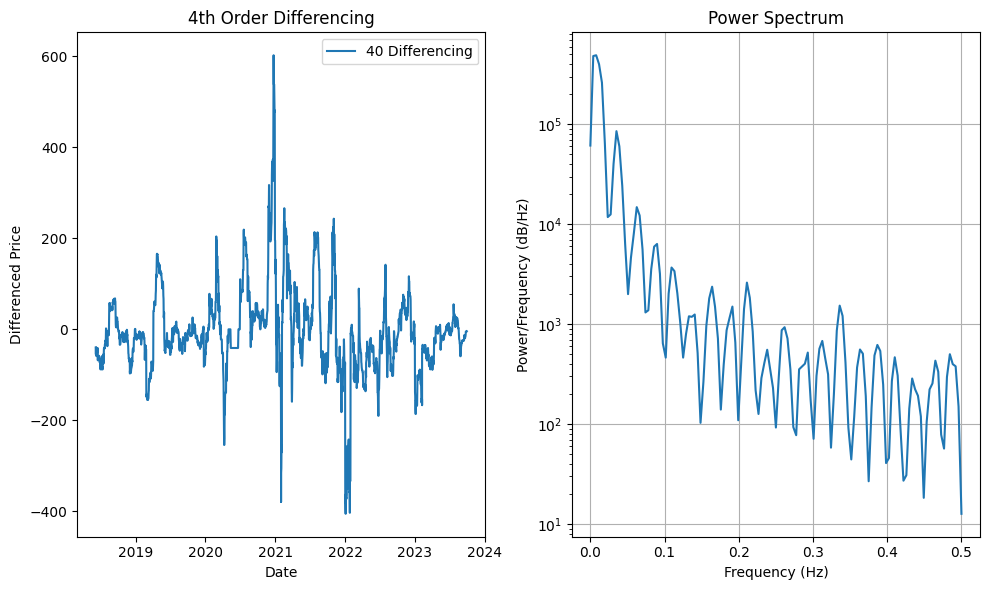

In [26]:
plot_differencing_and_spectrum(data['Close'], order=40, title='4th Order Differencing')

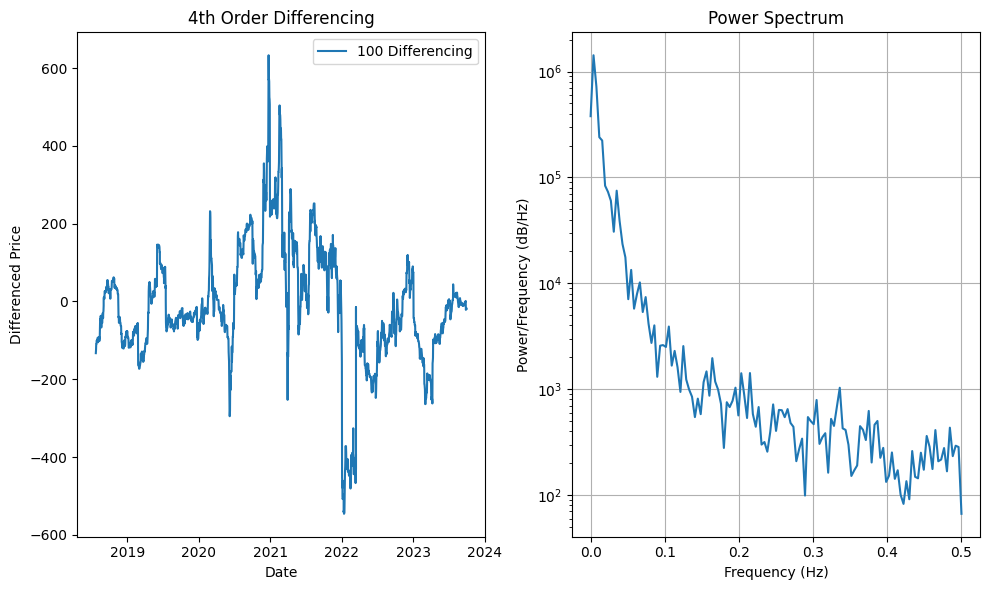

In [27]:
plot_differencing_and_spectrum(data['Close'], order=100, title='4th Order Differencing')

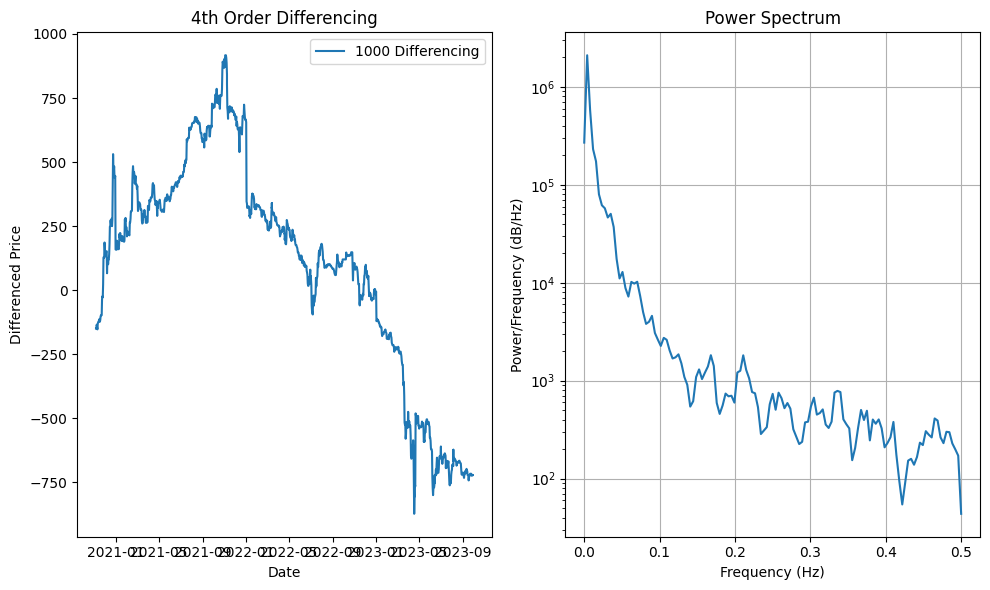

In [28]:
plot_differencing_and_spectrum(data['Close'], order=1000, title='4th Order Differencing')

In [37]:


# Set ARIMA order (p, d, q)
p = 1  # AR lag order
d = 1  # Differencing order
q = 1  # MA lag order

# Fit the ARIMA model
model = ARIMA(data['Close'], order=(p, d, q))
results = model.fit()

# Print model summary
print(results.summary())


/home/sailesh/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sailesh/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sailesh/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2232
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9285.254
Date:                Thu, 05 Oct 2023   AIC                          18576.508
Time:                        10:33:25   BIC                          18593.639
Sample:                             0   HQIC                         18582.764
                               - 2232                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4114      0.196     -2.101      0.036      -0.795      -0.028
ma.L1          0.4705      0.197      2.390      0.017       0.085       0.856
sigma2       241.2810      0.910    265.096      0.0

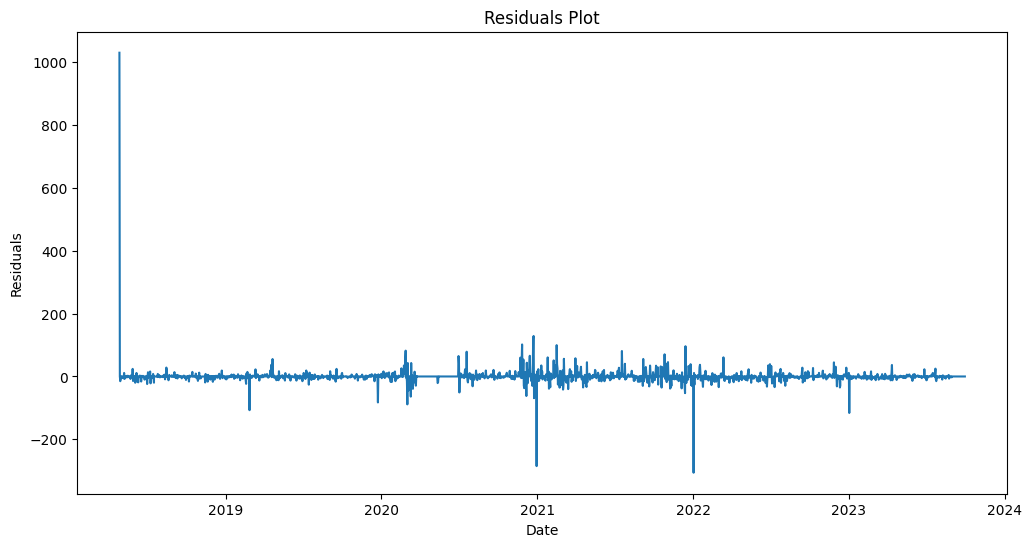

In [38]:

# Plot the residuals to check for randomness
residuals = results.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()


In [54]:
# Forecast future stock prices
forecast_steps = 30  # Number of future steps to forecast
x=results.forecast(steps=forecast_steps)

# Create a date rangeb for the forecasted values starting from the last date in your data


/home/sailesh/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [55]:
forecast_dates = pd.date_range(start=data.index[-1] - pd.DateOffset(days=30), periods=forecast_steps,)

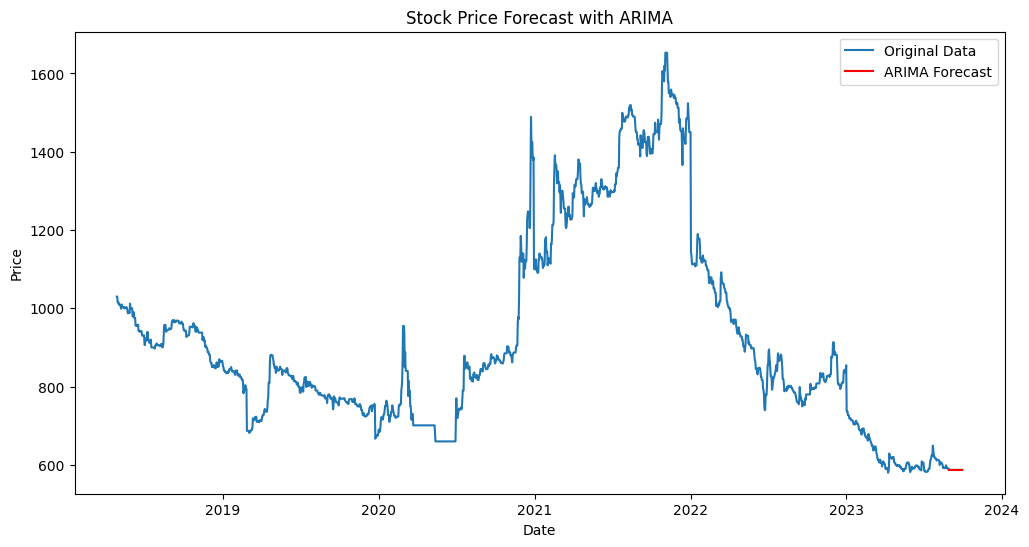

In [56]:

# Plot the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Original Data')
plt.plot(forecast_dates, x, label='ARIMA Forecast', color='red')
plt.title('Stock Price Forecast with ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [62]:
import itertools
from statsmodels.tsa.arima.model import ARIMA

def do_arima_grid_search(close=data["Close"], p_range=(0, 5), d_range=(0, 2), q_range=(0, 5)):
    best_aic = float("inf")  # Initialize with a high value
    best_order = None

    # Generate all possible combinations of p, d, and q values
    pdq_combinations = list(itertools.product(range(p_range[0], p_range[1] + 1),
                                               range(d_range[0], d_range[1] + 1),
                                               range(q_range[0], q_range[1] + 1)))

    for order in pdq_combinations:
        p, d, q = order
        try:
            # Fit the ARIMA model
            model = ARIMA(close, order=(p, d, q))
            results = model.fit()

            # Check if the current model has a lower AIC (Akaike Information Criterion)
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = order

        except Exception as e:
            continue

    if best_order is not None:
        print("Best ARIMA Order (p, d, q):", best_order)
        print("Best AIC:", best_aic)
        return best_order
    else:
        print("No valid ARIMA model found within the specified range.")
        return None

# Perform the grid search with specified ranges for p, d, and q
best_order = do_arima_grid_search(close=data["Close"], p_range=(0, 5), d_range=(0, 2), q_range=(0, 5))


/home/sailesh/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sailesh/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sailesh/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sailesh/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forec

Best ARIMA Order (p, d, q): (3, 0, 4)
Best AIC: 18.0
